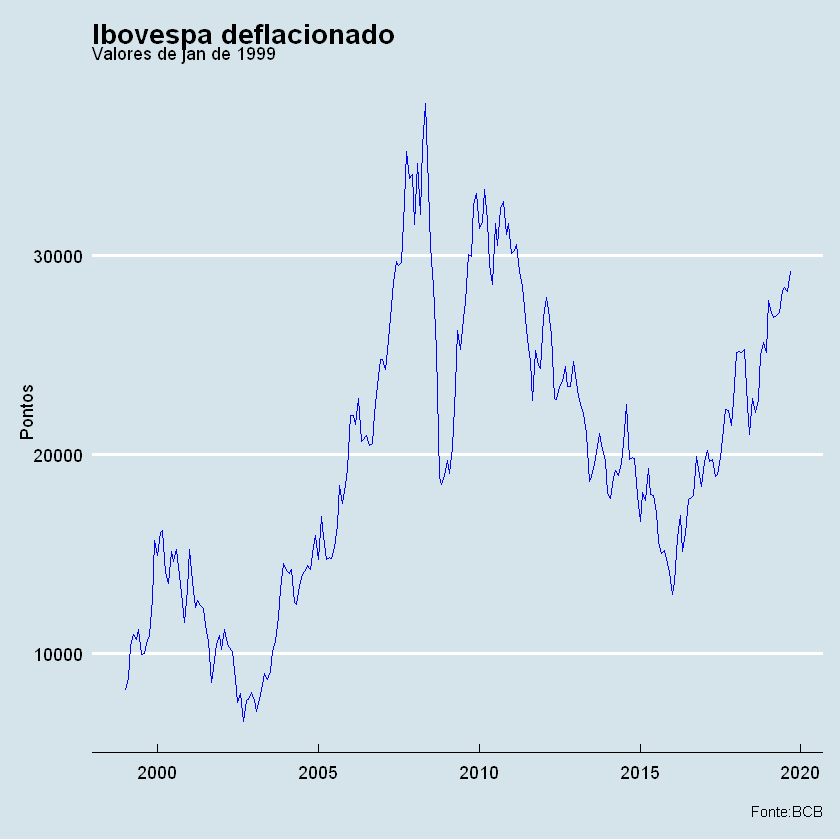

In [15]:
library(rbcb)
library(ggplot2)
library(ggthemes)
library(Quandl)
start <- as.Date("1999-01-01")
inflacao <- get_series(c(IPCA = 433), start_date = start, end_date = "2019-09-30")
ibov <- Quandl(code = "BCB/7", collapse = "monthly")
ibov <- ibov[-which(ibov$Date < start),]
infl <- cumprod((1+(inflacao$IPCA)/100))
ibov_def <- ibov$Value[length(ibov$Value):1]/infl
datas <- seq(start, as.Date("2019-09-30"), "1 month")
ibov_def <- data.frame(Datas = datas ,Valor = ibov_def)
ggplot(ibov_def, aes(x = Datas))+
  geom_line(aes(y = Valor), colour = "blue")+
  labs(x = "", y = "Pontos", title = "Ibovespa deflacionado", caption = "Fonte:BCB",
      subtitle = format(start,"Valores de %b de %Y"))+
  theme_economist()